<a href="https://colab.research.google.com/github/lalitha12-web/Linear-Regression-Assignment/blob/main/BoomBikesSharing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

## **"BoomBikes" bike sharing company Project**

 ### **Problem Statement**

 A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands






# **Steps for building a Model**

* **Step 1:** Reading, understanding and visualising data
* **Step 2:** Preparing the data for modeling(train-test split, rescaling)
* **Step 3:** Training the model
* **Step 4:** Residual analysis
* **Step 5:** Predictions and evaluation on the test set


**Step 1: Reading, understanding and visualising data**
* import necessary libraries
* Load the data
* Analysing raw data
     * Find the shape of the data
     * Datatypes of the data
     * Stastical information abou the data
     * Detailed Information about the columns by Data Dictionary
     * Checking null values
* Visualising data


In [71]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# read the data
filepath="/content/drive/MyDrive/IIITB-AIML/LinearRegression/day.csv"
bikes= pd.read_csv(filepath)


In [49]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [50]:
bikes.shape

(730, 16)

In [51]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [52]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [53]:
# Checl column names onec
bikes.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [54]:
# removing the unwanted columns
# if we observe columns and values here I feel that instant and dteday is unwanted columns as instant is identifier and already we have
# seperate columns of month and year

#Lets drop instant and dteday
bikes.drop(['instant'],axis=1,inplace=True)
bikes.drop(['dteday'],axis=1,inplace=True)

In [55]:
#lets check shape
bikes.shape


(730, 14)

In [56]:
# Now we need to convert season,month,weekday,weatherlist to categorical data
bikes.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikes.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikes.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

bikes.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


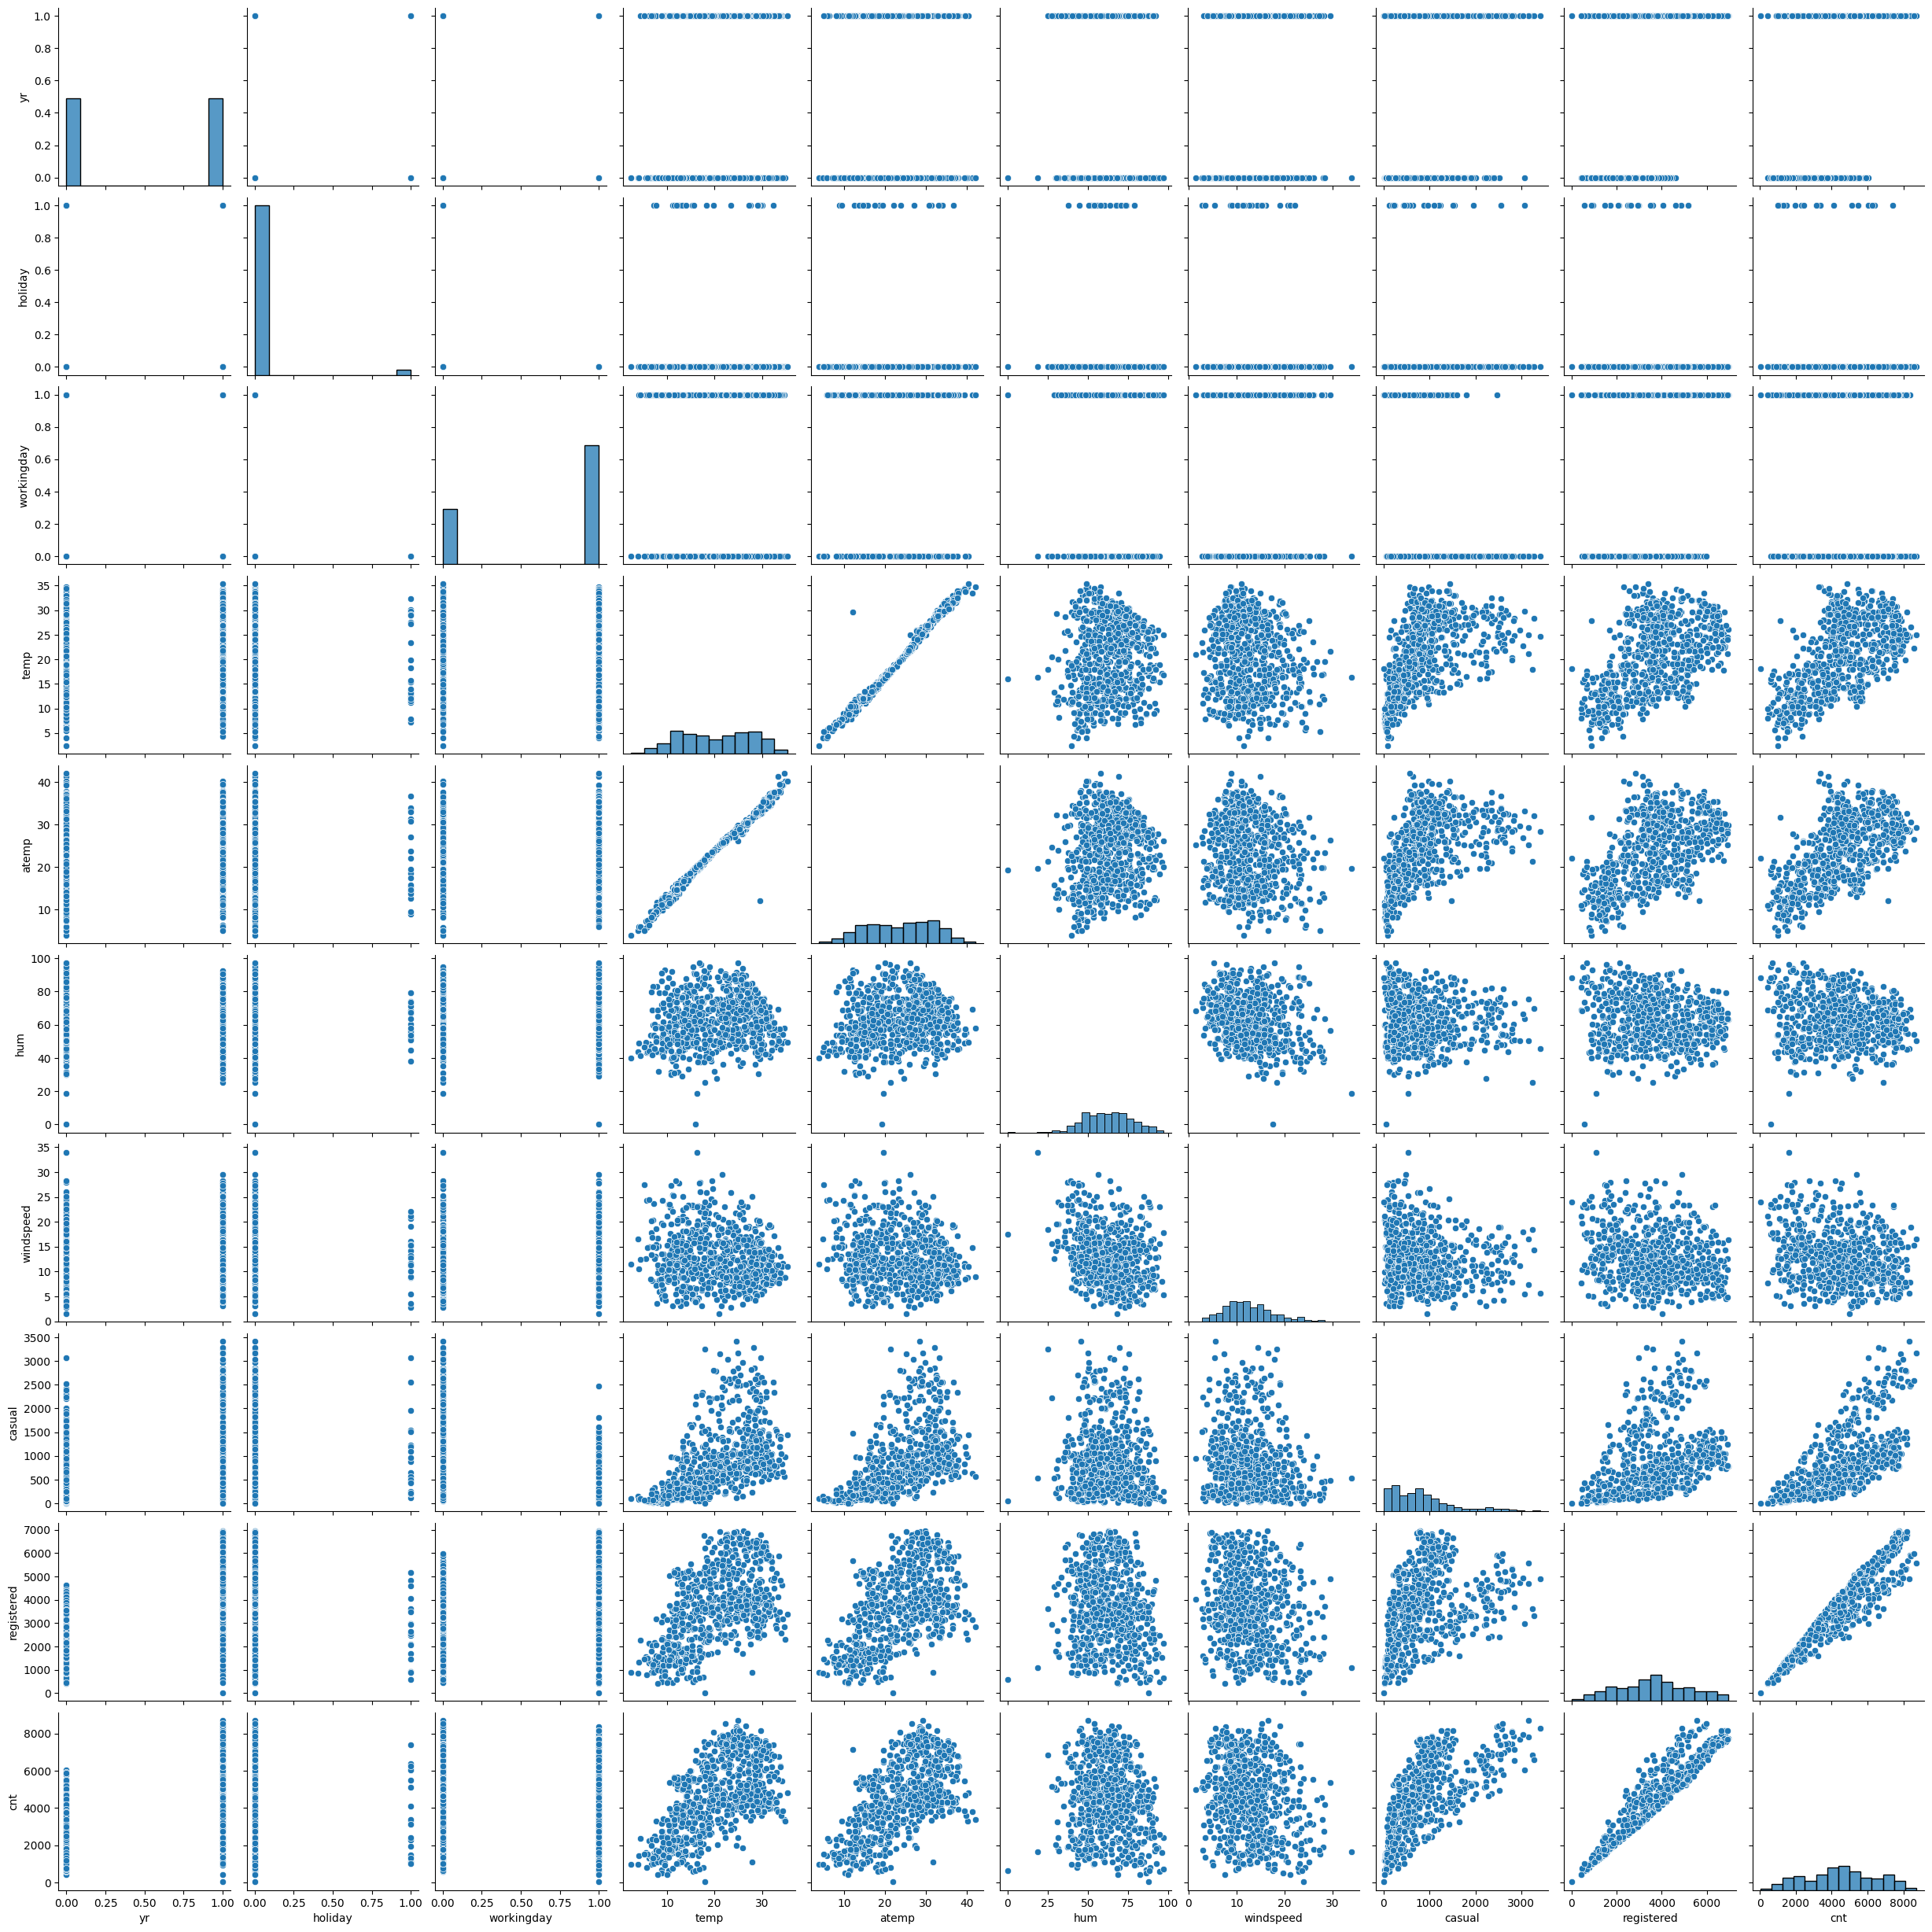

In [57]:
#visualizing data
sns.pairplot(bikes)

In [58]:
bikes.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

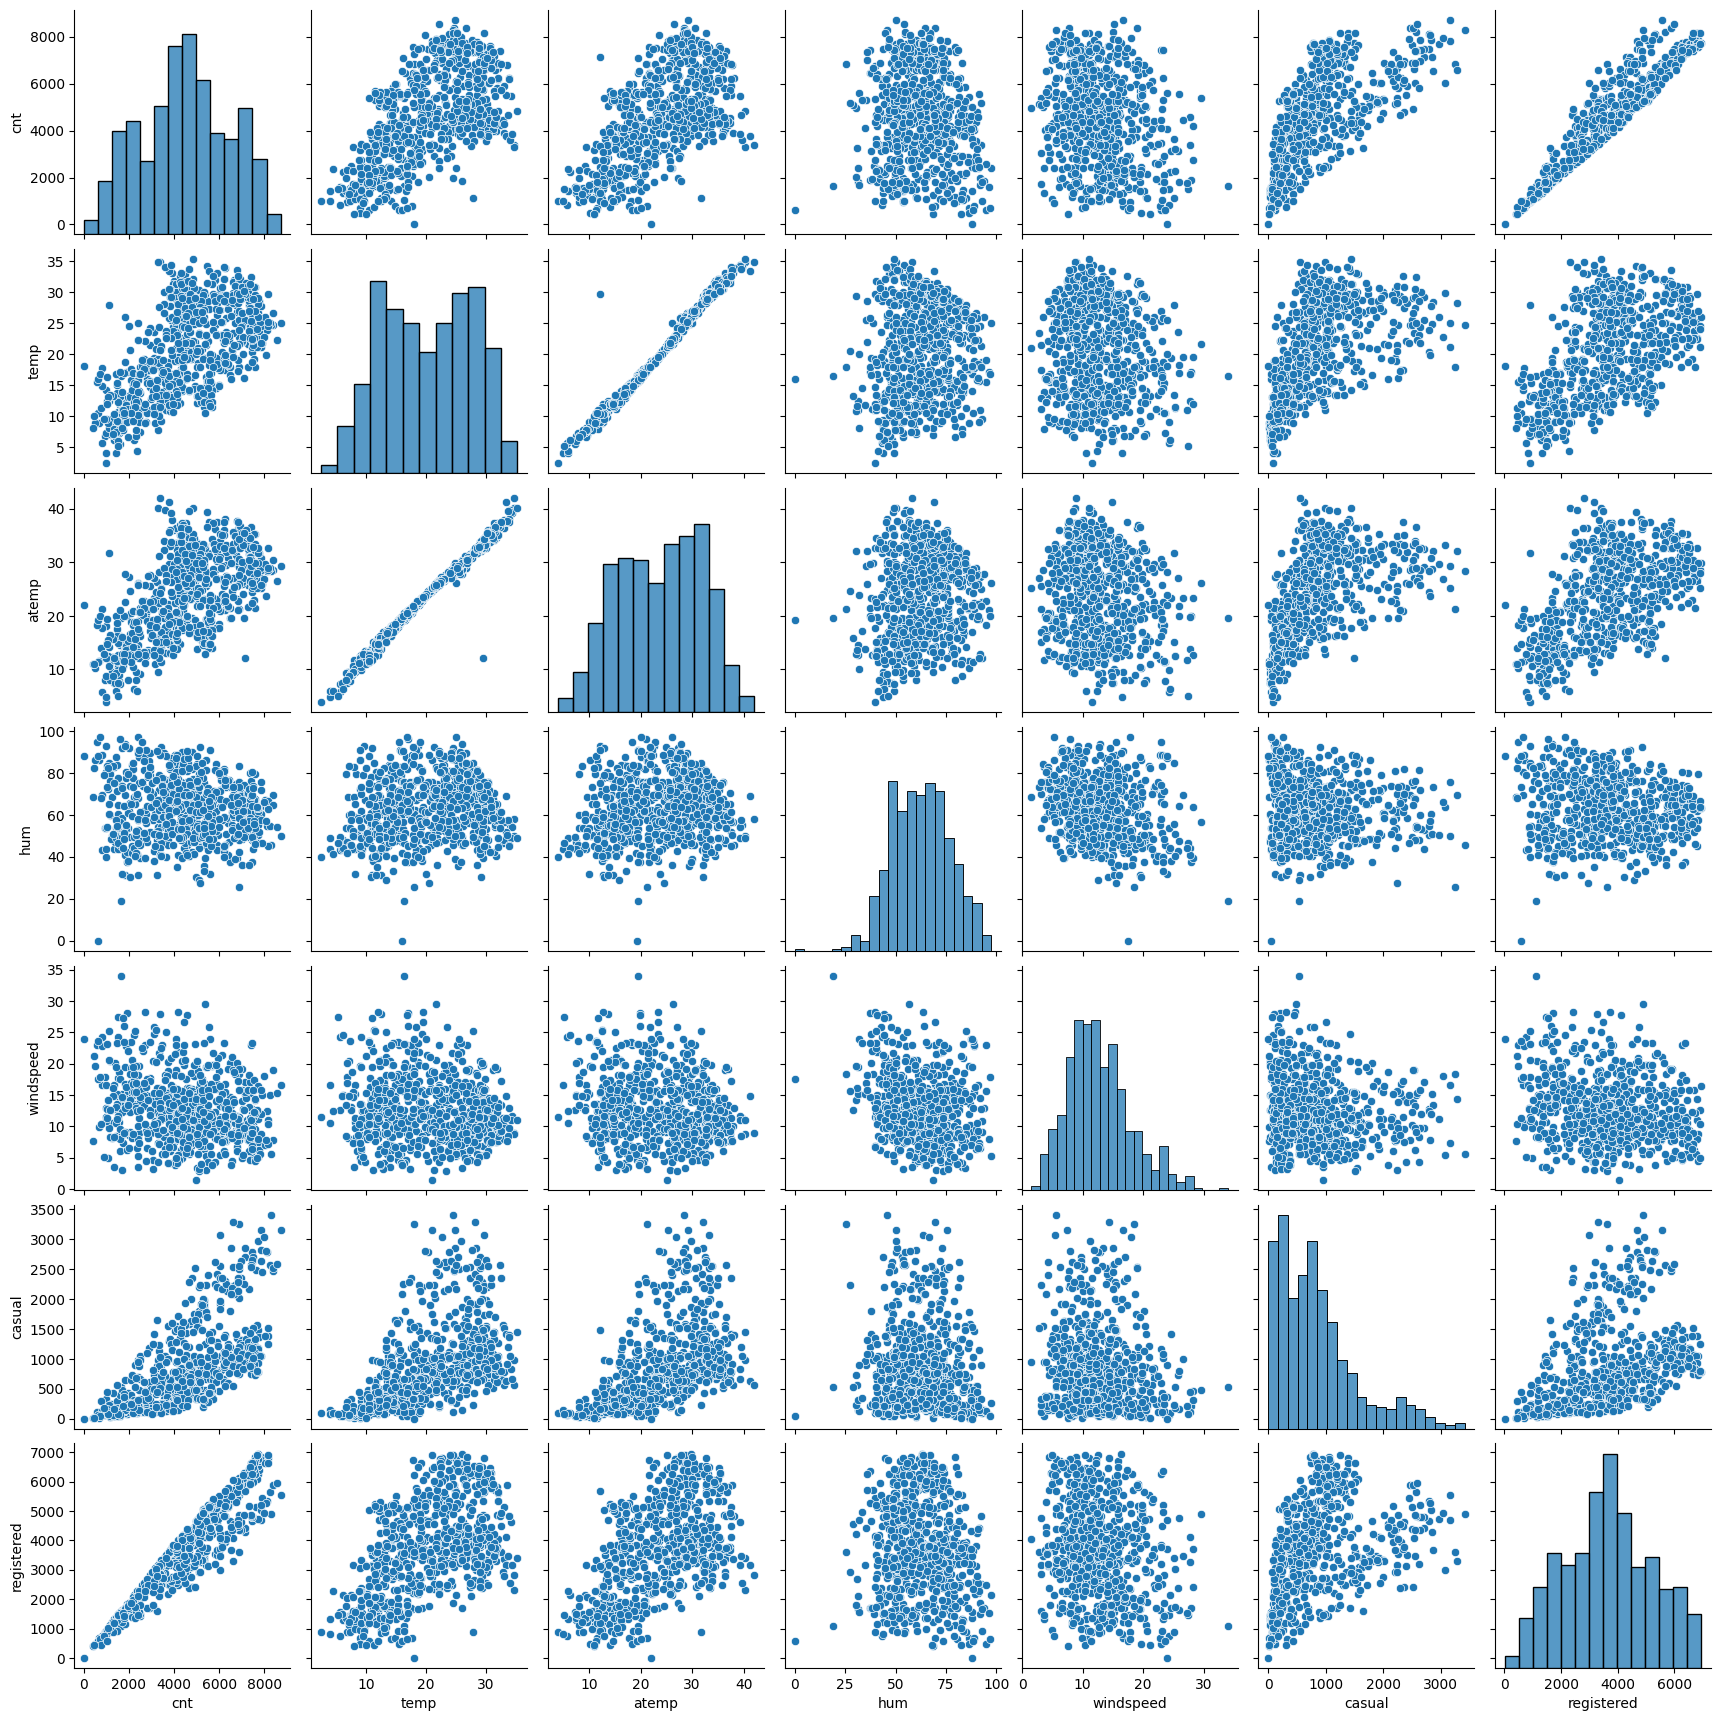

In [59]:
#Plots on numerical columns
bike_numvars=['cnt','temp','atemp','hum','windspeed','casual','registered']
sns.pairplot(data=bikes,vars=bike_numvars)

boxplot of season


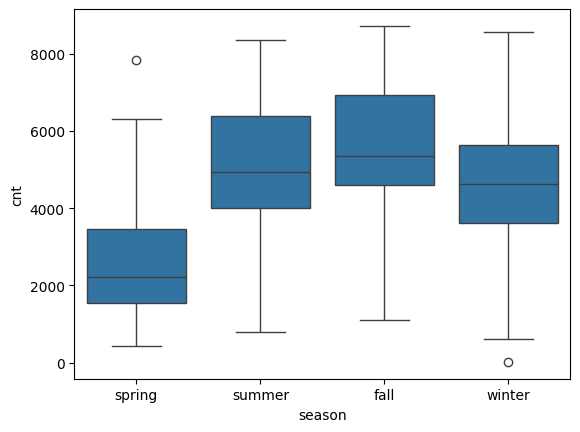

boxplot of yr


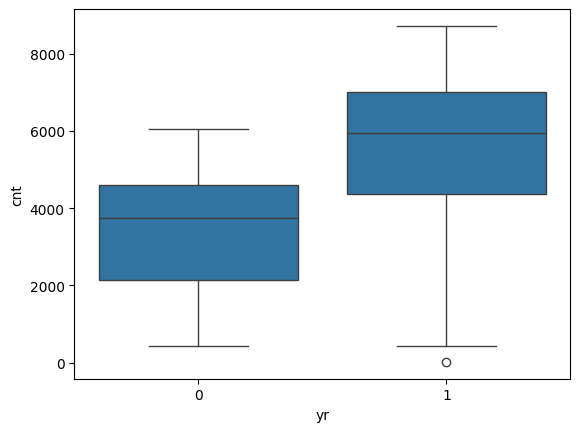

boxplot of mnth


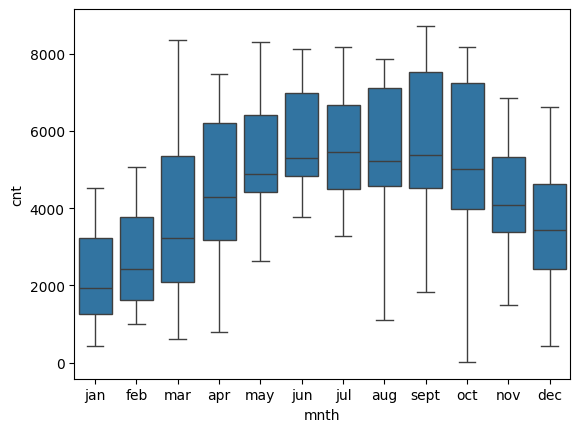

boxplot of holiday


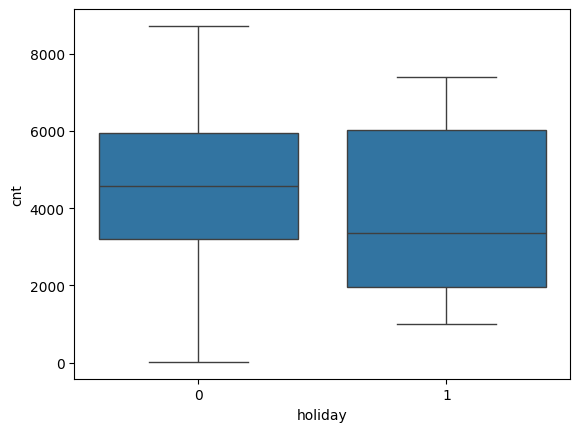

boxplot of weekday


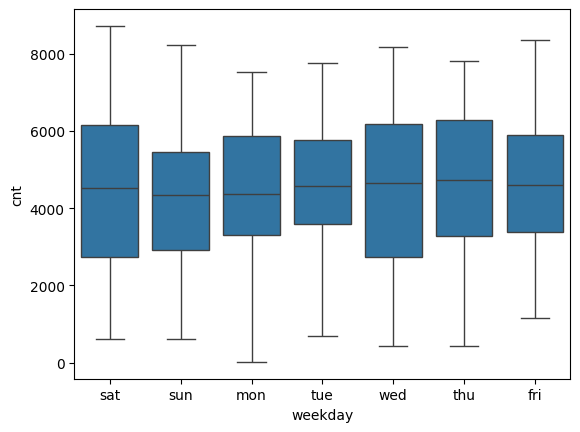

boxplot of workingday


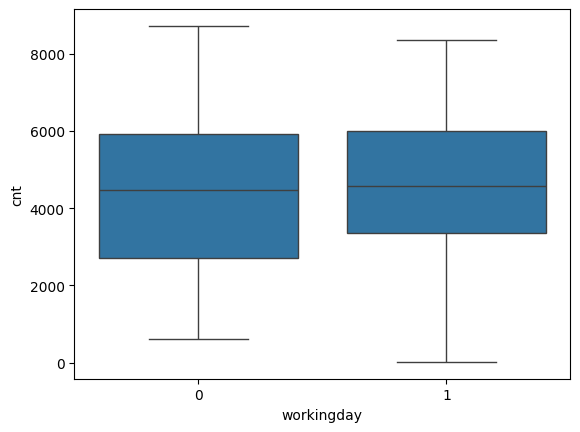

boxplot of weathersit


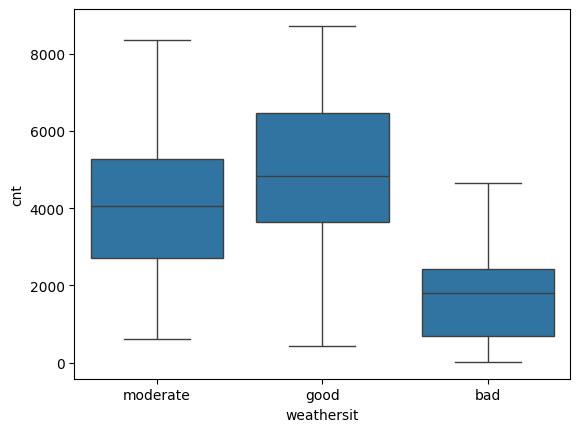

In [60]:
bike_catvars=['season','yr','mnth','holiday','weekday','workingday','weathersit']
#Plot box plots for Categorical data
for col in bike_catvars:
    print("boxplot of", col)
    sns.boxplot(x=bikes[col],y='cnt',data=bikes)
    plt.show()

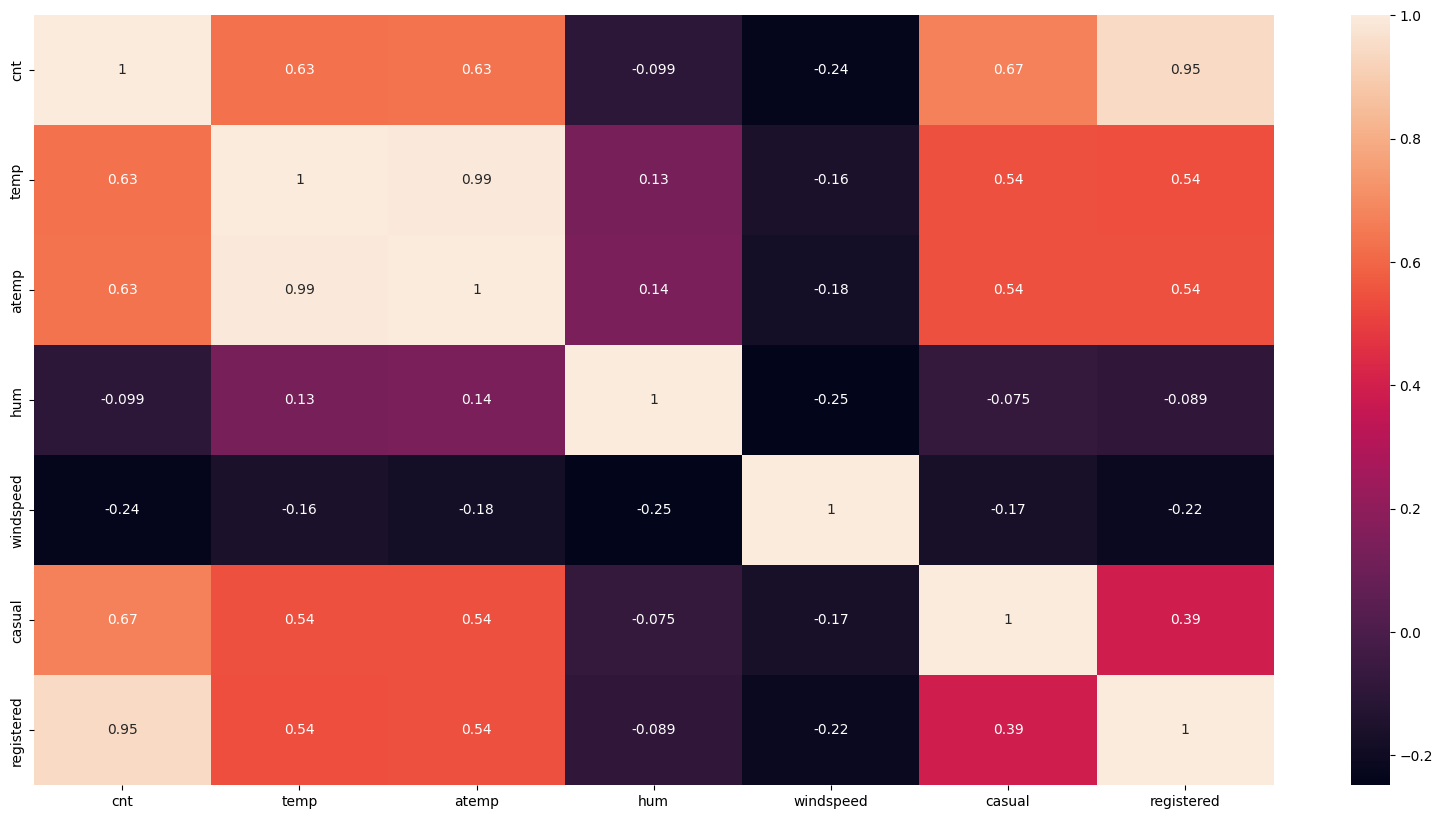

In [61]:
#Draw the heatmap for find the corelation between the variables
plt.figure(figsize=(20,10))
sns.heatmap(bikes[bike_numvars].corr(),annot=True)
plt.show()

 # **Step 2: Preparing the data for modeling(train-test split, rescaling)**
* Encoding
    * converting binary vars to 1/0
    * Other categorical vars to dummy vars

### **Create dummy variables for "season","mnth",weathersit","weekday"**

In [ ]:
bikes = pd.get_dummies(data=bikes,columns=["season","mnth","weekday"],drop_first=True)
bikes = pd.get_dummies(data=bikes,columns=["weathersit"])

In [67]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept'],
      dtype='object')

In [68]:
bikes.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
0,0,0,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,...,False,False,True,False,False,False,False,False,False,False
1,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,...,False,False,True,False,False,False,False,False,False,False
2,0,0,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,...,False,False,True,False,False,False,False,False,False,False
4,0,0,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,...,False,False,True,False,False,False,False,False,False,False


In [69]:
# Convert boolean dummy variables to integers
for col in bikes.columns:
    if bikes[col].dtype == 'bool':  # Check if the column is of boolean type
        bikes[col] = bikes[col].astype(int)

In [70]:
bikes.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
0,0,0,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


##Split data into trainset and test set

In [72]:
#Check the shape once
bikes.shape

(730, 31)

In [84]:
#lets take y value, the target value is cnt
#y=bikes.pop('cnt')

# lets assign x
X=bikes

#lets split train and test sets
bikes_train,bikes_test= train_test_split(bikes, train_size=0.7,random_state=100)
bikes_train.shape
bikes_test.shape



(220, 30)

In [82]:
bikes_test.shape

(220, 30)

In [81]:
bikes_train.shape

(510, 30)

Rescalling